Regression: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Classification:https://archive.ics.uci.edu/ml/datasets/Census+Income Data ingestion

    EDA
    Preprocessing
    Pickling for the preprocessing object(save the preprocessing model)
    After preprocessing you have to store data inside MONGODB

You have to load the data from mongo db Model

Regression:linear regression,ridge regression,lasso regression,elastic net, support vector regression

Classification: logistic regression,SVM(kernel)

Hyperparameter tuning is mandatory(GRID SEARCH CV)

Evaluation of the model Regression evaluation matrix: R2 and adjusted R2 Classification confusion matrix, ROC AUC score

Submission form link: https://forms.gle/2PJSSCmL9S865nwe8


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
2,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
4,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
10,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
11,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
12,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
class: >50K, <=50K

### Supplying the column names:

As the dataframe doesn't have column names, we will supply it from the info file.

In [5]:
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
            'marital-status', 'occupation', 'relationship', 'race', 'sex', 
            'capital-gain', 'capital-loss','hours-per-week', 'native-country', 
            'class']

In [6]:
type(colnames)

list

In [7]:
df.columns = colnames
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
# saving the data set
df.to_csv("adult_salary.csv", index = 0)

In [10]:
df = pd.read_csv("adult_salary.csv")

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Missing Values:

In [13]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

##### Nil missing values, hence we can proceed.

### Duplicates

In [14]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [15]:
df.shape

(32561, 15)

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(32537, 15)

##### Here we have handled the duplicates, now we can proceed.

### Segregating the numerical and categorical features

In [18]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [19]:
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [20]:
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


## EDA:


#### Pairplot:

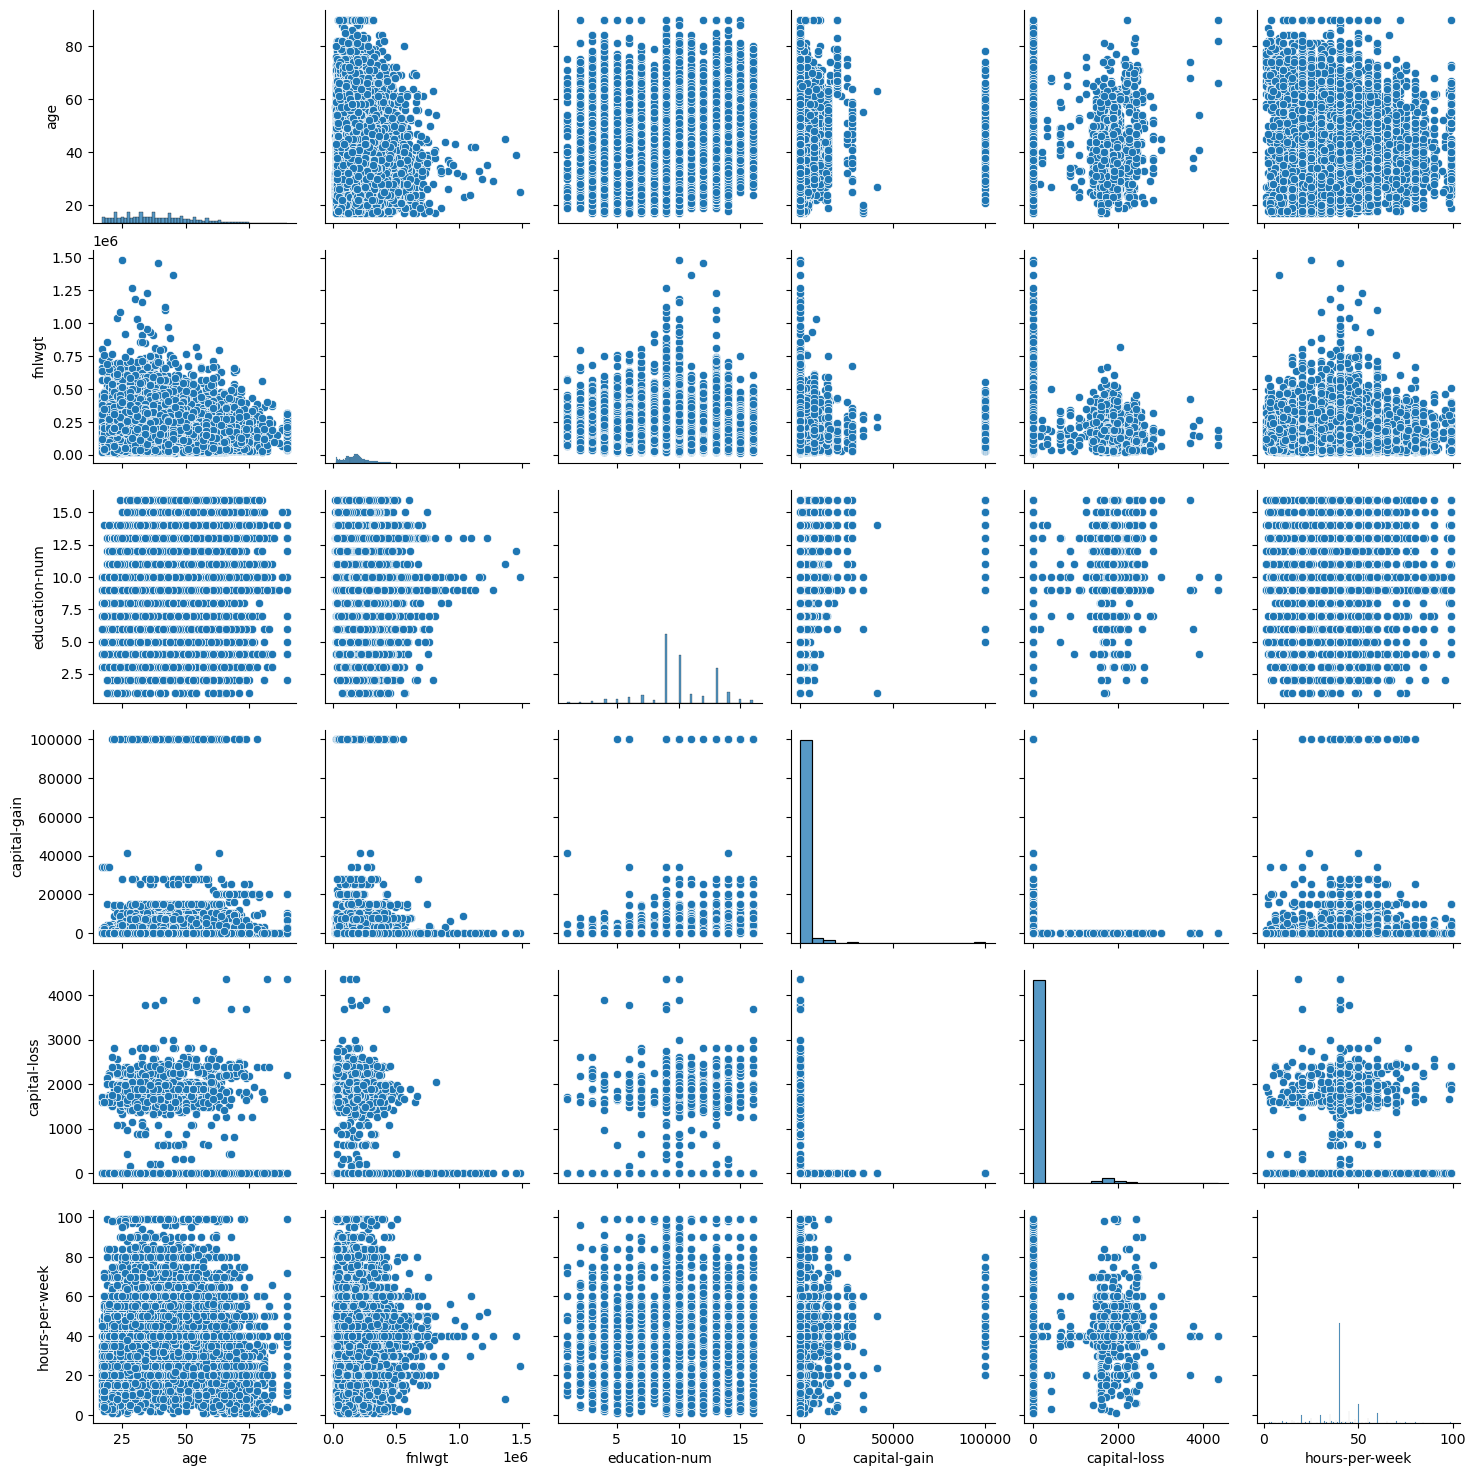

In [21]:
sns.pairplot(df, palette= '#d68848')

Pairplot shows that there is no relation whatsoever between different variables. We can analyse the numerical and categorical columns individually now.

### EDA of Numerical Columns:


##### Comparative boxplots:

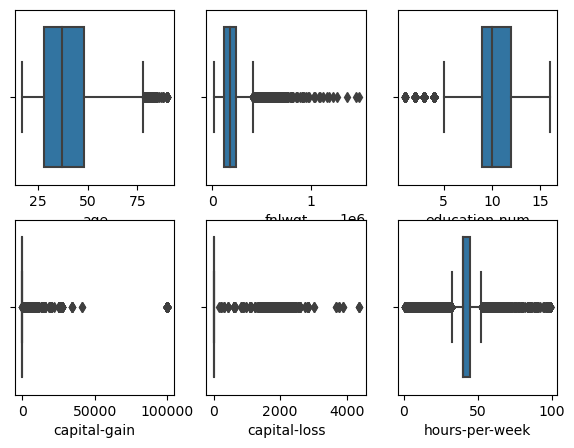

In [22]:
plt.figure(figsize=(7,5)) 
for i in range(6):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = df_num.iloc[:, i] , data = df_num)

The following columns are full of outliers only:  
- capital-gain
-capital-loss

##### Comparative Violinplots:

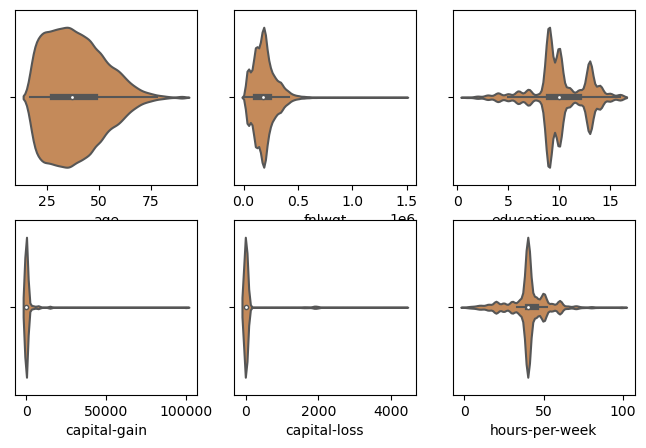

In [23]:
plt.figure(figsize=(8,5)) 
for i in range(6):
    plt.subplot(2,3,i+1)
    sns.violinplot(x = df_num.iloc[:, i] , data = df_num, color = '#d68848')

These plots clearly indicate that there are outliers present in the data. We will need to handle them if we use logistic regression and support vector classifier.

### Correlation:

In [24]:
cor = df_num.corr()

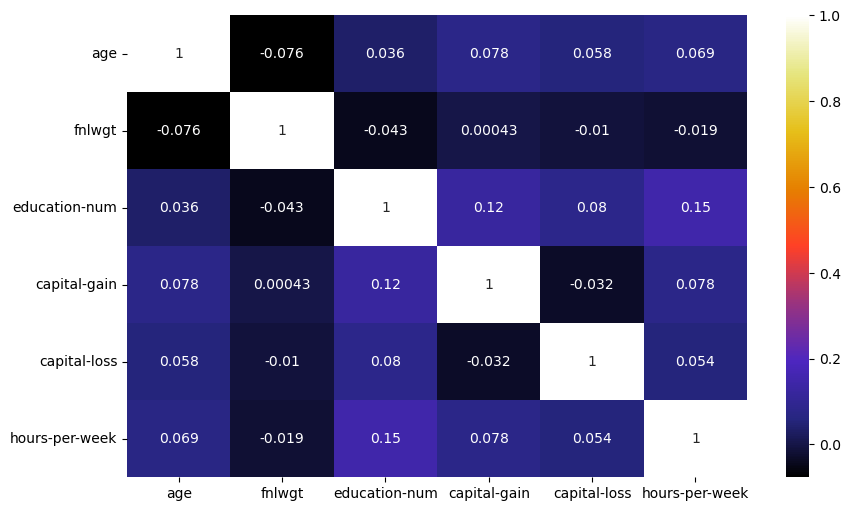

In [25]:
plt.figure(figsize = (10,6))
sns.heatmap(cor, cmap="CMRmap", annot=True)
plt.show()

The result clearly shows that the data is not very correlated, hence no need to bother about it.

### EDA of Categorical Columns:

In [26]:
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [27]:
for col in df_cat.columns:
    print("The value counts for column :", col)
    print(df_cat[col].value_counts())
    print()

The value counts for column : workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

The value counts for column : education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

The value counts for column : marital-status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-A

There are various columns where instead of a category we have "?". Lets analyse a bit deeply.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

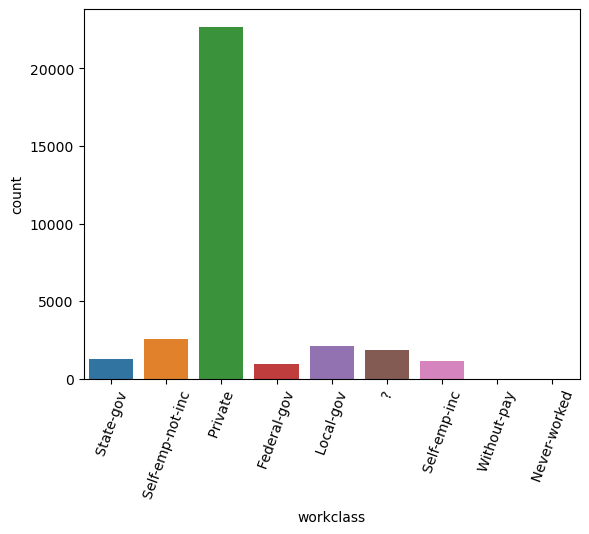

In [28]:
sns.countplot(df['workclass'])
plt.xticks(rotation = 70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

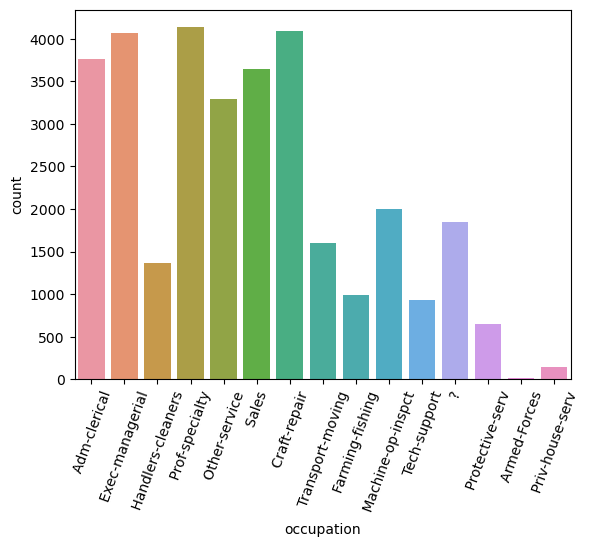

In [29]:
sns.countplot(df['occupation'])
plt.xticks(rotation = 70)

In [30]:
(df[df['workclass']== ' ?'].shape[0])/(df.shape[0])*100

5.6428066508897565

In [31]:
df[df['workclass']== ' ?'].shape

(1836, 15)

### Whitespaces in the categorical data:

We have some unwanted whitespaces in the categorical data column, which makes it difficult to search. We will handle it here. or we can skip the initial whitespaces in the pandas dataframe at the time of reading this data.

In [32]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
# applying whitespace_remover function on dataframe
whitespace_remover(df)

In [33]:
# applying whitespace_remover function on dcategorical df
whitespace_remover(df_cat)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, '?'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

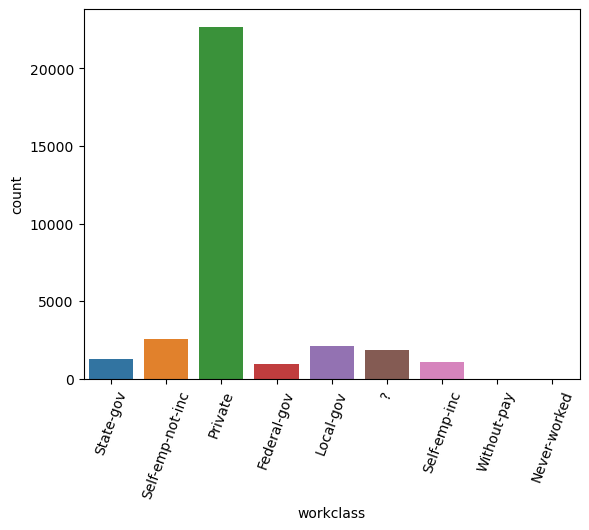

In [34]:
# checking the function
sns.countplot(df['workclass'])
plt.xticks(rotation = 70)

We have successfully done this activity.

### Exploring the '?' category:

In [35]:
df[df['workclass']== '?'].shape

(1836, 15)

In [36]:
df[df['occupation']== '?'].shape

(1843, 15)

In [37]:
# % of ? in workclass 
(df[df['workclass']== '?'].shape[0])/(df.shape[0])*100

5.6428066508897565

In [38]:
# % of ? in occupation 
(df[df['occupation']== '?'].shape[0])/(df.shape[0])*100

5.664320619602299

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [40]:
df[df['workclass'] == '?'].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1836.0,40.960240,20.334587,17.0,21.00,35.0,61.0,90.0
fnlwgt,1836.0,188516.338235,107089.902252,12285.0,117771.25,175617.0,234568.5,981628.0
education-num,1836.0,9.260349,2.601986,1.0,9.00,9.0,10.0,16.0
capital-gain,1836.0,606.795752,5147.323872,0.0,0.00,0.0,0.0,99999.0
capital-loss,1836.0,60.760349,354.685264,0.0,0.00,0.0,0.0,4356.0
hours-per-week,1836.0,31.919390,14.909903,1.0,20.00,36.0,40.0,99.0


In [41]:
df[df['occupation'] == '?'].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
fnlwgt,1843.0,188658.667390,107089.077646,12285.0,117876.0,175653.0,234595.0,981628.0
education-num,1843.0,9.253391,2.602791,1.0,9.0,9.0,10.0,16.0
capital-gain,1843.0,604.491047,5137.669748,0.0,0.0,0.0,0.0,99999.0
capital-loss,1843.0,60.529571,354.030421,0.0,0.0,0.0,0.0,4356.0
hours-per-week,1843.0,31.906131,14.908311,1.0,20.0,36.0,40.0,99.0


In [42]:
df[df['native-country'] == '?'].describe().T

,count,mean,std,min,25%,50%,75%,max
age,582.0,38.740550,12.410216,17.0,30.00,37.0,46.0,90.0
fnlwgt,582.0,193384.587629,95504.200875,22245.0,132963.75,182586.5,227238.0,647882.0
education-num,582.0,10.601375,3.125466,1.0,9.00,10.0,13.0,16.0
capital-gain,582.0,1809.621993,11146.605495,0.0,0.00,0.0,0.0,99999.0
capital-loss,582.0,118.469072,471.610459,0.0,0.00,0.0,0.0,3004.0
hours-per-week,582.0,41.515464,12.438306,1.0,40.00,40.0,45.0,99.0


We have to imploy some imputers to take care of this or we as the ? is present in case of categorical variables, we can consider them as a seperate category.

Also as the ? category is only around 6% of the total data we can drop that. 

### Function to drop ? category:

In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [44]:
df.shape

(32537, 15)

In [45]:
for i in df.columns:
    df = df[df[i] != "?"]

In [46]:
df.shape

(30139, 15)

#### We have successfuly dropped the ? category from the dataframe. Now lets move ahead to preprocessing.

## Preprocessing:


#### Segregating the dependent and the target variables:

In [47]:
X = df.drop(columns = "class", axis = 1)
y = df['class']

X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [48]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: class, dtype: object

### Removing Outliers

<AxesSubplot:>

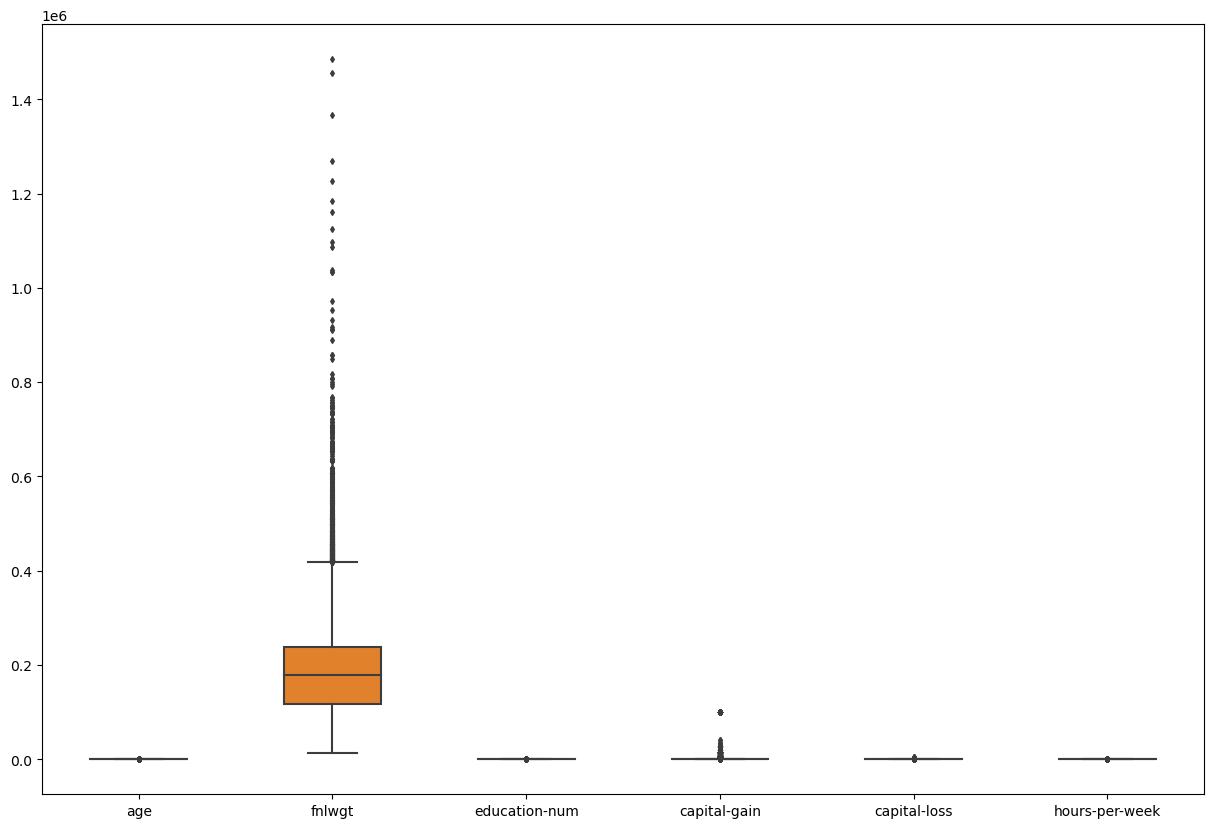

In [49]:


# Visulaizing the outliers in the data
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)

There are many outliers in fnlwgt, so lets handle them.

### Handling Outliers:

In [50]:
# segregating the numerical & categorical columns
df_num = X.select_dtypes(include=[np.number])
df_cat = X.select_dtypes(exclude=[np.number])

# function for clipping the outliers
def outlierClip(x):
    q1 = np.percentile(x, 25, interpolation = 'midpoint')
    q3 = np.percentile(x, 75, interpolation = 'midpoint')
    iqr = q3 - q1
    # setting the limit to 2 times the Inter Quartile Range
    upper = q3 + 1.5* iqr
    lower = q1 - 1.5* iqr
    # using clip function
    x = x.clip(lower=lower, upper=upper)
    return x

# function for applying the clip function on a dataframe
def applyFunc(d):
    d = d.apply(lambda x: outlierClip(x))
    return d

# using the functions on numerical columns
df_num = applyFunc(df_num)

# merging the new numerical with existing categorical variable

df = pd.merge(left=df_num, right=df_cat, left_index = True, right_index=True)

df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39.0,77516.0,13.0,0.0,0.0,40.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50.0,83311.0,13.0,0.0,0.0,32.5,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


<AxesSubplot:>

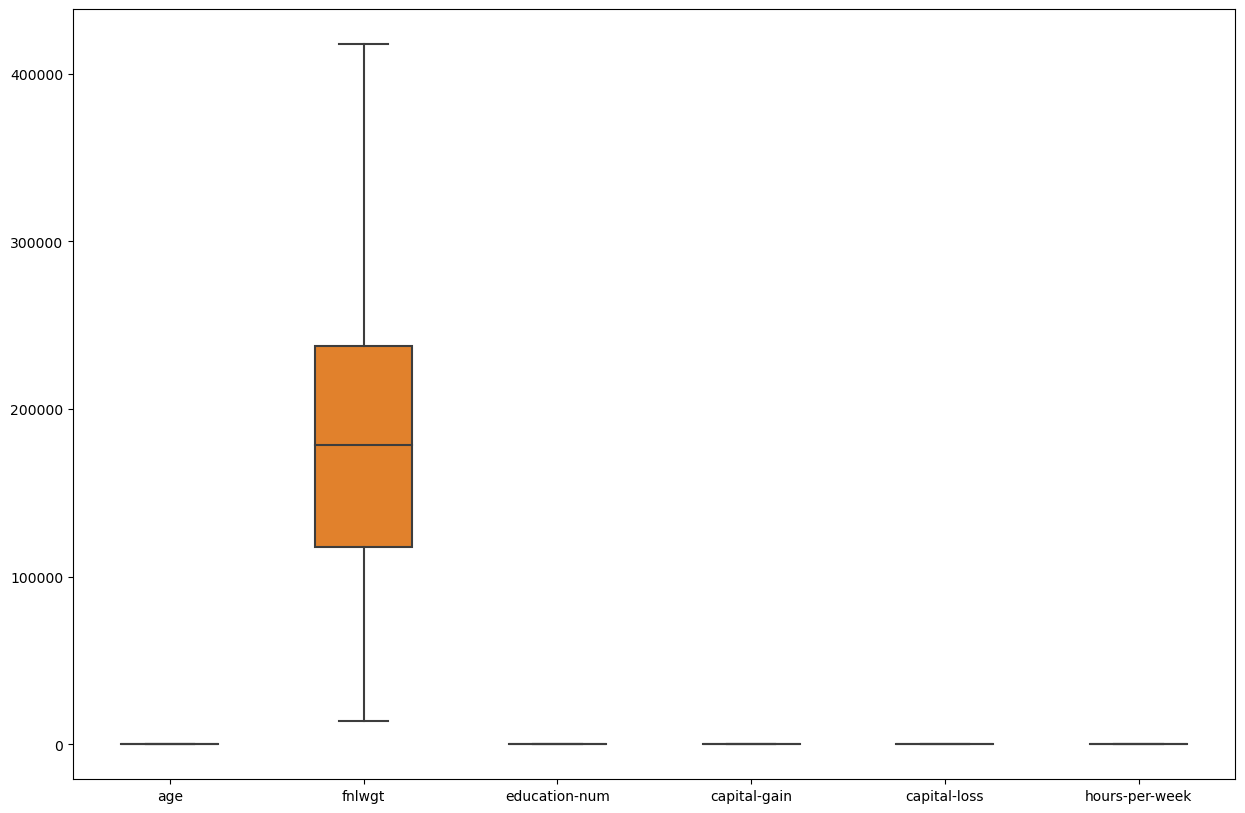

In [51]:
# checking the data now:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

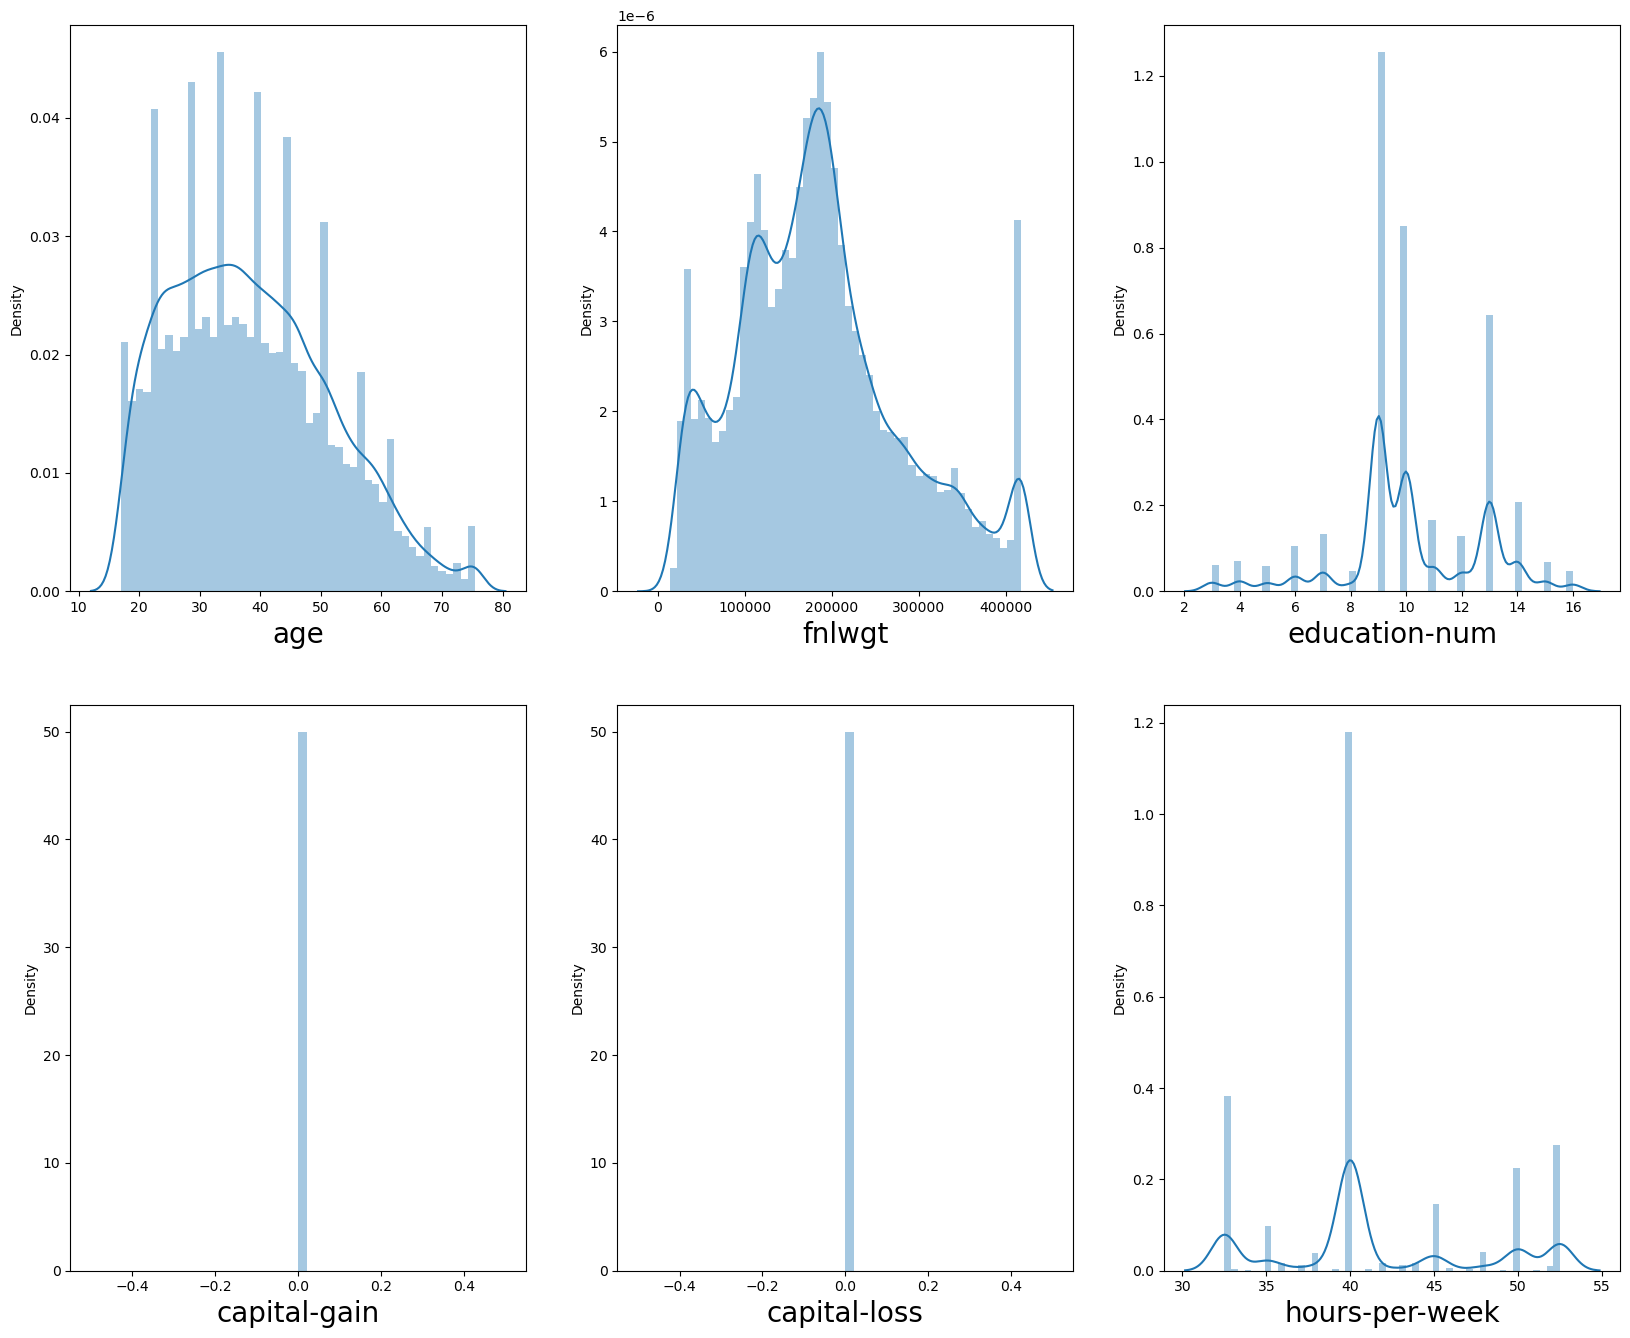

In [52]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_num:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_num[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

##### We have successfuly handled the outliers.

### Preprocessing data with Column Transformer


- The data provided has both the numerical columns as well as the categorical columns, we can process the data at the same time using the column transformer.
- The categorical data can be processed by using one-hot encoder.
- The numerical data can be preprocessed by using standard scaler.

In [53]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

# using the column names of numerical & catego. colum
num_col_list = list(df_num.columns)
cat_col_list = list(df_cat.columns)

In [54]:
'''
The below code will produce similar result:

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)

'''

'\nThe below code will produce similar result:\n\nfrom sklearn.compose import make_column_selector as selector\n\nnumerical_columns_selector = selector(dtype_exclude=object)\ncategorical_columns_selector = selector(dtype_include=object)\n\nnumerical_columns = numerical_columns_selector(df)\ncategorical_columns = categorical_columns_selector(df)\n\n'

In [55]:
# handle_unknown="ignore" to solve the potential issues due to rare categories 

from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

# Importing Column Transformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, cat_col_list),
    ('standard_scaler', numerical_preprocessor, num_col_list)])


# using preprocessor to transform the data

df_prep = preprocessor.fit_transform(df)

# for the target variable:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_prep = encoder.fit_transform(y)

In [56]:
df_prep

<30139x104 sparse matrix of type '<class 'numpy.float64'>'
	with 361668 stored elements in Compressed Sparse Row format>

In [57]:
y_prep

array([0, 0, 0, ..., 0, 0, 1])

##### We have preprocessod the data. Now we can move to model Fitting.

### Train test split

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_prep, y_prep, test_size = 0.40, random_state=42)

In [59]:
X_train

<18083x104 sparse matrix of type '<class 'numpy.float64'>'
	with 216996 stored elements in Compressed Sparse Row format>

In [60]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

### Model Fitting: Logistic Regression:

In [61]:
# Impporting Logistic Regression:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=500)


# fitting the logistic regression:
log_clf.fit(X_train, y_train)

# predict the outcome:
pred_log_train = log_clf.predict(X_train)
pred_log_test = log_clf.predict(X_test)

In [62]:
# Accuracy Score:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

bacc_log = balanced_accuracy_score(y_test,
                                   pred_log_test)

acc_log = accuracy_score(y_test,pred_log_test)


f1_log = f1_score(y_test,pred_log_test)


prob_log = log_clf.predict_proba(X_test)

f,t,th=roc_curve(y_test,
                 prob_log[:,1],
                 pos_label=1,
                 drop_intermediate=False)

r=roc_auc_score(y_test, prob_log[:,1])

conf_mat = confusion_matrix(y_test, pred_log_test)

print("Log_Reg: Confusion Matrix for Test Data")
print(conf_mat)

print("Log_Reg: Accuracy Score for Test Data")
print(acc_log)

print("Log_Reg: Balanced accuracy Score for Test Data")
print(bacc_log)

print("Log_Reg: F1 Accuracy Score for Test Data")
print(f1_log)

print("Log_Reg: The Area under ROC Curve is:")
print(r)

Log_Reg: Confusion Matrix for Test Data
[[8335  683]
 [1344 1694]]
Log_Reg: Accuracy Score for Test Data
0.8318679495686795
Log_Reg: Balanced accuracy Score for Test Data
0.7409331362875886
Log_Reg: F1 Accuracy Score for Test Data
0.6256694367497692
Log_Reg: The Area under ROC Curve is:
0.8897230956855946


#### Logistic Regression with Grid Search CV

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-4,4,100), 
      "penalty":["l1","l2"],
      # l1 lasso l2 ridge
      'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
     }
# model logistic regression
log_clf = LogisticRegression()

log_gcv = GridSearchCV(log_clf,                    # model
                   param_grid = grid,   # hyperparameters
                   scoring='accuracy',     # metric for scoring
                   cv=10,
                       verbose = 2,
                       n_jobs = -1)


# fitting the logistic regression_gcv:
log_gcv.fit(X_train, y_train)

# print the best parameters
print(" The best parameters of the Grid Search are:")
print(log_gcv.best_params_)


/home/vyoom/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vyoom/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

 The best parameters of the Grid Search are:
{'C': 0.20565123083486536, 'penalty': 'l2', 'solver': 'newton-cg'}


In [64]:
# fitting the best parameters

log_best = LogisticRegression(C= 0.20565123083486536, 
                              penalty = 'l2', 
                              solver = 'newton-cg')

# fit the model
log_best.fit(X_train, y_train)

# predict the outcome:
pred_log_best_train = log_best.predict(X_train)
pred_log_best_test = log_best.predict(X_test)

# Accuracy Score:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

bacc_log_best = balanced_accuracy_score(y_test,
                                   pred_log_best_test)

acc_log_best = accuracy_score(y_test,pred_log_best_test)


f1_log_best = f1_score(y_test,pred_log_best_test)


prob_log_best = log_best.predict_proba(X_test)

f,t,th=roc_curve(y_test,
                 prob_log_best[:,1],
                 pos_label=1,
                 drop_intermediate=False)

r_best=roc_auc_score(y_test, prob_log_best[:,1])

conf_mat_best = confusion_matrix(y_test, pred_log_best_test)

print("Log_Reg_best: Confusion Matrix for Test Data")
print(conf_mat_best)

print("Log_Reg_best: Accuracy Score for Test Data")
print(acc_log_best)

print("Log_Reg_best: Balanced accuracy Score for Test Data")
print(bacc_log_best)

print("Log_Reg_best: F1 Accuracy Score for Test Data")
print(f1_log_best)

print("Log_Reg_best: The Area under ROC Curve is:")
print(r_best)

Log_Reg_best: Confusion Matrix for Test Data
[[8353  665]
 [1354 1684]]
Log_Reg_best: Accuracy Score for Test Data
0.8325315195753152
Log_Reg_best: Balanced accuracy Score for Test Data
0.7402853206614348
Log_Reg_best: F1 Accuracy Score for Test Data
0.6252088360868758
Log_Reg_best: The Area under ROC Curve is:
0.8900507265769829


#### The best model has nominal improvement over the base model.

### Model Fitting: SVM Kernel

In [65]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear',
          probability = True,
          random_state = 3)

# fitting the data
svc.fit(X_train, y_train)

# predict the outcome:
pred_svc_train = svc.predict(X_train)
pred_svc_test = svc.predict(X_test)

# Accuracy Score:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

bacc_svc = balanced_accuracy_score(y_test,
                                   pred_svc_test)

acc_svc = accuracy_score(y_test,pred_svc_test)


f1_svc = f1_score(y_test,pred_svc_test)


prob_svc = svc.predict_proba(X_test)

f,t,th=roc_curve(y_test,
                 prob_svc[:,1],
                 pos_label=1,
                 drop_intermediate=False)

r_svc=roc_auc_score(y_test, prob_svc[:,1])

cnfm_svc = confusion_matrix(y_test, pred_svc_test)

print("SVC: Confusion Matrix for Test Data")
print(cnfm_svc)

print("SVC: Accuracy Score for Test Data")
print(acc_svc)

print("SVC: Balanced accuracy Score for Test Data")
print(bacc_svc)

print("SVC: F1 Accuracy Score for Test Data")
print(f1_svc)

print("SVC_: The Area under ROC Curve is:")
print(r_svc)

SVC: Confusion Matrix for Test Data
[[8341  677]
 [1362 1676]]
SVC: Accuracy Score for Test Data
0.830872594558726
SVC: Balanced accuracy Score for Test Data
0.7383033289722216
SVC: F1 Accuracy Score for Test Data
0.6217770358004081
SVC_: The Area under ROC Curve is:
0.8844491910042835


##### The base SVC model is giving the result very similar to the logistic regression model. So now lets try the grid search method.

### SVC with Grid Search

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid={"C":[0.01, 0.1, 1, 10, 100], 
      "gamma":[1, 0.1, 0.001],
      'kernel':['linear','rbf', 'sigmoid']
     }
# model logistic regression
svc_gcv = SVC(probability = True)

svc_gcv = GridSearchCV(svc_gcv,                    # model
                   param_grid = grid,   # hyperparameters
                   scoring='accuracy',     # metric for scoring
                   cv=5,
                       verbose = 2,
                       n_jobs = -1)


# fitting the logistic regression_gcv:
svc_gcv.fit(X_train, y_train)

# print the best parameters
print(" The best parameters of the SVC Grid Search are:")
print(svc_gcv.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
 The best parameters of the SVC Grid Search are:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
[CV] END .....................C=0.01, gamma=1, kernel=linear; total time= 1.5min
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time= 2.4min
[CV] END ................C=0.01, gamma=0.001, kernel=sigmoid; total time= 2.1min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.7min
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time= 1.4min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 1.5min
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 1.6min
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time= 1.5min
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time= 2.0min
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time= 2.5min
[CV] END ....................C=10, gamm

Now fitting the best model:

In [70]:
from sklearn.svm import SVC

svc_best = SVC(kernel = 'rbf',
               C = 1,
               gamma = 0.1,
          probability = True,
          random_state = 3)

# fitting the data
svc_best.fit(X_train, y_train)

# predict the outcome:
pred_svc_best_train = svc_best.predict(X_train)
pred_svc_best_test = svc_best.predict(X_test)

# Accuracy Score:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

bacc_svc_best = balanced_accuracy_score(y_test,
                                   pred_svc_best_test)

acc_svc_best = accuracy_score(y_test,pred_svc_best_test)


f1_svc_best = f1_score(y_test,pred_svc_best_test)


prob_svc_best = svc_best.predict_proba(X_test)

f,t,th=roc_curve(y_test,
                 prob_svc_best[:,1],
                 pos_label=1,
                 drop_intermediate=False)

r_svc_best=roc_auc_score(y_test, prob_svc_best[:,1])

cnfm_svc_best = confusion_matrix(y_test, pred_svc_best_test)

print("SVC: Confusion Matrix for Test Data")
print(cnfm_svc_best)

print("SVC: Accuracy Score for Test Data")
print(acc_svc_best)

print("SVC: Balanced accuracy Score for Test Data")
print(bacc_svc_best)

print("SVC: F1 Accuracy Score for Test Data")
print(f1_svc_best)

print("SVC_: The Area under ROC Curve is:")
print(r_svc_best)

SVC: Confusion Matrix for Test Data
[[8408  610]
 [1345 1693]]
SVC: Accuracy Score for Test Data
0.8378400796284008
SVC: Balanced accuracy Score for Test Data
0.7448160149600587
SVC: F1 Accuracy Score for Test Data
0.6339636772140048
SVC_: The Area under ROC Curve is:
0.8729006948432154


##### The best SVC grid gives a score very similar to the SVC.  All its parameters have slight increase whereas the AUC has decreased slightly.  But depending on the comupational requirement the base logistic regression model is performing best in this scenario.